In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Econ 484/datasets'

Mounted at /content/gdrive
/content/gdrive/My Drive/Econ 484/datasets


# Data Cleaning and Wrangling

In [ ]:
df=pd.read_csv("484_final_project_data.csv")
df=df.rename(columns={'Unnamed: 5':'city'})
df.head()
df.columns

Index(['Station', 'Route', 'Beg MP', 'End MP', 'Location Description', 'city',
       'County', 'Downtown', 'College Town', 'Population', 'Cars (2020)',
       'Employment', 'Unemployment Rate', 'gdp', 'AADT2020', 'AADT2019',
       'AADT2018', 'AADT2017', 'AADT2016', 'AADT2015', 'AADT2014', 'AADT2013',
       'AADT2012', 'AADT2011', 'AADT2010', 'AADT2009', 'AADT2008', 'AADT2007',
       'AADT2006', 'AADT2005', 'AADT2004', 'AADT2003', 'AADT2002', 'AADT2001',
       'AADT2000', 'AADT1999', 'AADT1998', 'AADT1997', 'AADT1996', 'AADT1995',
       'AADT1994', 'AADT1993', 'AADT1992', 'AADT1991', 'AADT1990', 'AADT1989',
       'AADT1988', 'AADT1987', 'AADT1986', 'AADT1985', 'AADT1984', 'AADT1983',
       'AADT1982', 'AADT1981'],
      dtype='object')

In [ ]:
#reshape the traffic data so that year is a column

df["id"]=df.index
vars_keep = ['id','Station', 'Route', 'Beg MP', 'End MP', 'Location Description', 'city',
       'County', 'Downtown', 'College Town', 'Population', 'Cars (2020)',
       'Employment', 'Unemployment Rate', 'gdp']
vars_reshape = [x for x in df.columns if x not in vars_keep]
#df=pd.wide_to_long(traffic,"AADT",i=vars_keep, j="year")

df=df.melt(id_vars=vars_keep, value_vars=vars_reshape, var_name="year", value_name='traffic', ignore_index=True)

In [ ]:
df.to_csv(r'/content/gdrive/My Drive/Econ 484/datasets/reshaped_484_data.csv',index=False)
#export the data to excel


In [ ]:
#Now that data is reshaped we attached it to a csv where we put in our control variables
data=pd.read_csv('clean_final_data.csv') #read in the data

In [ ]:
#data = pd.get_dummies(data) #get everything into numeric variabls so it works with the package
counties = pd.get_dummies(data['county'])
data = data.drop(['county'],axis=1)
data = pd.concat([data,counties], axis=1)
data.head()

,city,year,avg_traffic,Population_Density,Population,GDP_County,College_Enrollment,Cars,Unemployment,Percent_White,Percent_Black,Percent_Asian,Percent_Native,Cache,Davis,Iron,Salt Lake,Utah,Washington,Weber
0,Cedar,2010,8877.777778,785.555254,28932,1166086,8024,34548,9.67,0.921970,0.003030,0.008622,0.033442,0,0,1,0,0,0,0
1,Cedar,2011,9155.555556,791.582949,29154,1259079,8152,34372,8.61,0.916599,0.007620,0.012842,0.027377,0,0,1,0,0,0,0
2,Cedar,2012,9144.444444,789.302199,29070,1216561,8297,34639,6.03,0.920334,0.005675,0.008182,0.024025,0,0,1,0,0,0,0
3,Cedar,2013,8911.111111,787.048602,28987,1256291,7745,34964,5.11,0.926171,0.006520,0.009625,0.024529,0,0,1,0,0,0,0
4,Cedar,2014,10633.333330,796.443117,29333,1355277,7656,35698,4.32,0.907352,0.003668,0.008398,0.028209,0,0,1,0,0,0,0


In [ ]:
#scale X's and define y

y=data['avg_traffic']
year = data['year']
X=data.loc[:,[x for x in data.columns if x not in ('avg_traffic','year','city')]]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #create scaler object
scaler.fit(X) #feed the scaler object the x
x_scaled = scaler.transform(X)

x_columns = ['Population_Density', 'Population', 'GDP_County', 'College_Enrollment',
       'Cars', 'Unemployment', 'Percent_White', 'Percent_Black',
       'Percent_Asian', 'Percent_Native', 'Cache ', 'Davis', 'Iron',
       'Salt Lake', 'Utah', 'Washington', 'Weber']

intermediate_df = pd.DataFrame(x_scaled, columns = x_columns)

intermediate_df['year'] = year
intermediate_df['avg_traffic'] = y

In [ ]:
intermediate_df['city'] = data['city']
intermediate_df.head()
#now we have a cleaned and scaled data set. Let's do some exploration

,Population_Density,Population,GDP_County,College_Enrollment,Cars,Unemployment,Percent_White,Percent_Black,Percent_Asian,Percent_Native,Cache,Davis,Iron,Salt Lake,Utah,Washington,Weber,year,avg_traffic,city
0,-1.805053,-1.241732,-1.283555,-0.105719,-1.521772,2.919431,0.384287,-1.069184,-1.109046,0.765039,-0.267261,-0.267261,3.741657,-1.069045,-0.392232,-0.267261,-0.267261,2010,8877.777778,Cedar
1,-1.799175,-1.236509,-1.280997,-0.096109,-1.522316,2.338408,0.259162,-0.620281,-0.895473,0.390484,-0.267261,-0.267261,3.741657,-1.069045,-0.392232,-0.267261,-0.267261,2011,9155.555556,Cedar
2,-1.801399,-1.238485,-1.282167,-0.085223,-1.521491,0.924221,0.346185,-0.810489,-1.131289,0.183469,-0.267261,-0.267261,3.741657,-1.069045,-0.392232,-0.267261,-0.267261,2012,9144.444444,Cedar
3,-1.803597,-1.240438,-1.281074,-0.126666,-1.520485,0.419937,0.482174,-0.727859,-1.058262,0.214597,-0.267261,-0.267261,3.741657,-1.069045,-0.392232,-0.267261,-0.267261,2013,8911.111111,Cedar
4,-1.794435,-1.232298,-1.278352,-0.133348,-1.518215,-0.013089,0.043731,-1.006865,-1.120400,0.441877,-0.267261,-0.267261,3.741657,-1.069045,-0.392232,-0.267261,-0.267261,2014,10633.333330,Cedar


# Data Visualization and Exploration

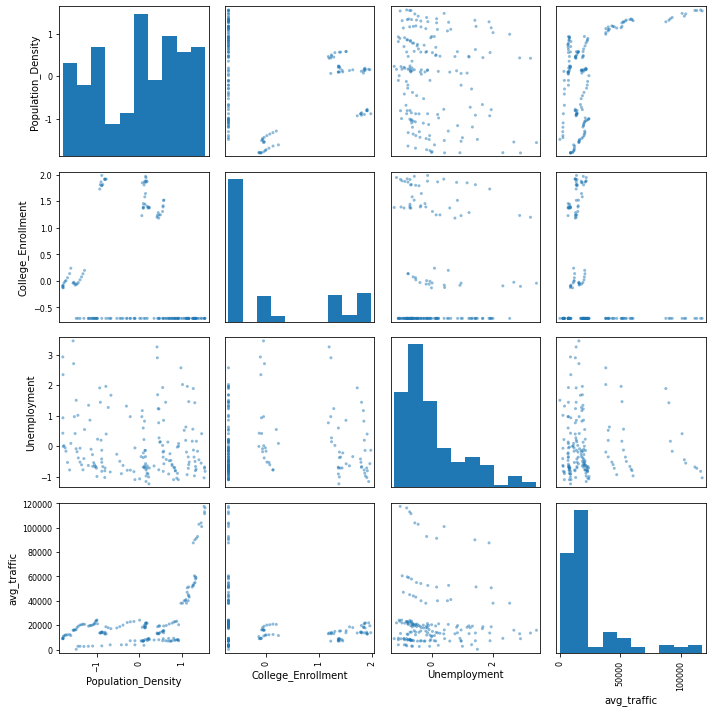

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
scatter_matrix(intermediate_df.loc[:,[x for x in intermediate_df.columns if x in ('avg_traffic','Population_Density','College_Enrollment','Unemployment')]],figsize = (10,10))

#create scatter matrix
plt.tight_layout() # this makes the output a little neater when you display plots
plt.show() # this will force the plots to show, they only show without this if they are the output of the last line in a cell

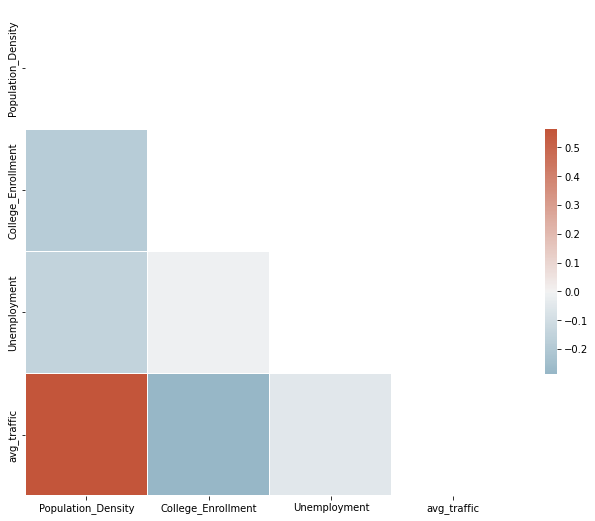

In [ ]:
# Compute the correlation matrix
import numpy as np
import seaborn
subset = intermediate_df.loc[:,[x for x in intermediate_df.columns if x in ('avg_traffic','Population_Density','College_Enrollment','Unemployment')]]
corr = subset.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#creates a correlation heatmap

Text(0, 0.5, 'Average Daily Traffic In Provo')

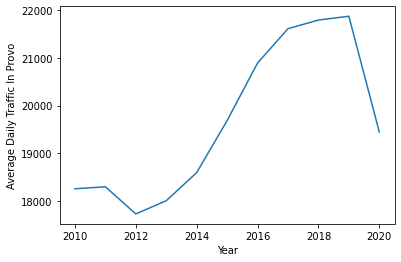

In [ ]:
#This gives the traffic over time raw data

fig = plt.figure()
ax = plt.axes()

provo = intermediate_df[intermediate_df['city']=='Provo']
provo_traffic = provo['avg_traffic']
provo_year = provo['year']
ax.plot(provo_year,provo_traffic);

ax.set_xlabel('Year')
ax.set_ylabel('Average Daily Traffic In Provo')

In [ ]:
#Now Divide into pre and post periods for use in ML models

#divide pre and post treatment, only use pre observations in ML
print(intermediate_df.head())
pre = intermediate_df[intermediate_df["year"] > 2018]
post = intermediate_df[intermediate_df["year"] < 2019]


   Population_Density  Population  GDP_County  ...  year   avg_traffic   city
0           -1.805053   -1.241732   -1.283555  ...  2010   8877.777778  Cedar
1           -1.799175   -1.236509   -1.280997  ...  2011   9155.555556  Cedar
2           -1.801399   -1.238485   -1.282167  ...  2012   9144.444444  Cedar
3           -1.803597   -1.240438   -1.281074  ...  2013   8911.111111  Cedar
4           -1.794435   -1.232298   -1.278352  ...  2014  10633.333330  Cedar

[5 rows x 20 columns]


# Supervised ML Creation of V Weights

This will go through all the steps of supervised machine learning

In [ ]:
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#separate pre and post y variable and x matrix
pre_x = pre.drop(['year','avg_traffic','city'], axis=1)
pre_y = pre['avg_traffic']
pre_year = pre['year']
pre_city = pre['city']
post_x = post.drop(['year','avg_traffic','city'], axis=1)
post_y = post['avg_traffic']
post_city = post['city']
post_year = post['year']

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pre_x, pre_y,
                                                    random_state=42)

NameError: ignored

In [ ]:
#Lasso get parameters from cross validation
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

lasso = linear_model.Lasso(max_iter=100000)
param_grid = {'alpha' : [.1,.2,.3,.6,.8,.9,1],'fit_intercept' : [True,False]}
grid_search_lasso = GridSearchCV(lasso,param_grid,cv=5,return_train_score=True)
best_lasso = grid_search_lasso.fit(X_train,y_train)
print(best_lasso.best_params_)
print(best_lasso.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.329e+09, tolerance: 1.662e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.468e+07, tolerance: 1.751e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

{'alpha': 0.9, 'fit_intercept': True}
-19.603648389719144


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.880e+07, tolerance: 1.921e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
#evaluate on test split data
from sklearn.metrics import mean_squared_error
lasso_predict = best_lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predict)
print(lasso_mse)

2002993614.6088178


In [ ]:
#follow the same process but try for elastic net
from sklearn.linear_model import ElasticNetCV

net = ElasticNetCV(cv=5, random_state=0)
net.fit(X_train, y_train)

print(net.score)

net_predict = net.predict(X_test)
net_mse=mean_squared_error(y_test,net_predict)
print(net_mse)

#The elastic net mse is better than the best lasso mse by a factor of 10. It looks big because of our large y but it will improve performance
#This is equivalent to being off by a little over half of the average y which is an improvement

<bound method RegressorMixin.score of ElasticNetCV(cv=5, random_state=0)>
204540122.6442126


In [ ]:
#use kaggle as a model to fit the best model and get predictions and coefficients
print(net.coef_)
v_weights = abs(net.coef_) #get the absolute value for correct weighting
print(v_weights)

[ 891.11473727   41.71466837  559.14496721 -523.20964397  534.67281717
  161.57432237  201.60907613 -246.23960355  176.11798021 -291.59930476
 -337.26160438 -110.72364837 -239.0844455   437.7442982   -28.58554166
  -42.26863933 -102.83198285]
[891.11473727  41.71466837 559.14496721 523.20964397 534.67281717
 161.57432237 201.60907613 246.23960355 176.11798021 291.59930476
 337.26160438 110.72364837 239.0844455  437.7442982   28.58554166
  42.26863933 102.83198285]


In [ ]:
#create new x matrix weighted by the v coefficients
X_unweighted = intermediate_df.drop(['year','avg_traffic','city'], axis=1)
X_weighted = X_unweighted.to_numpy()*v_weights.reshape(1,-1)
X_weighted = pd.DataFrame(data=X_weighted, columns = x_columns)

X_weighted['year'] = intermediate_df['year']
X_weighted['avg_traffic'] = intermediate_df['avg_traffic']
X_weighted['city'] = intermediate_df['city']
X_weighted.head()

,Population_Density,Population,GDP_County,College_Enrollment,Cars,Unemployment,Percent_White,Percent_Black,Percent_Asian,Percent_Native,Cache,Davis,Iron,Salt Lake,Utah,Washington,Weber,year,avg_traffic,city
0,-1608.509751,-51.798440,-717.693219,55.313143,-813.650159,471.705010,77.475699,263.275360,-195.322959,-223.084787,90.136955,29.59214,-894.572082,-467.968339,11.212172,11.296769,27.483003,2010,8877.777778,Cedar
1,-1603.271335,-51.580561,-716.263278,50.285108,-813.941202,377.826690,52.249490,152.737687,-157.708880,-113.864989,90.136955,29.59214,-894.572082,-467.968339,11.212172,11.296769,27.483003,2011,9155.555556,Cedar
2,-1605.253439,-51.663002,-716.917071,44.589288,-813.499677,149.330402,69.793957,199.574398,-199.240320,-53.499466,90.136955,29.59214,-894.572082,-467.968339,11.212172,11.296769,27.483003,2012,9144.444444,Cedar
3,-1607.211945,-51.744461,-716.306148,66.272687,-812.962240,67.851106,97.210635,179.227677,-186.378937,-62.576383,90.136955,29.59214,-894.572082,-467.968339,11.212172,11.296769,27.483003,2013,8911.111111,Cedar
4,-1599.047568,-51.404883,-714.784053,69.768743,-811.748459,-2.114812,8.816530,247.929950,-197.322553,-128.850969,90.136955,29.59214,-894.572082,-467.968339,11.212172,11.296769,27.483003,2014,10633.333330,Cedar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1052.324043,54.077332,544.099013,370.508068,495.081610,-85.365397,-623.768767,-488.887695,438.861367,-992.096365,90.136955,29.59214,63.898006,409.472297,11.212172,11.296769,27.483003,2016,43000.000000,westvalley
161,1042.035140,53.664146,608.929887,370.508068,538.967885,-98.650065,-721.054856,-547.820459,505.891752,-1136.979094,90.136955,29.59214,63.898006,409.472297,11.212172,11.296769,27.483003,2017,44000.000000,westvalley
162,1032.479414,53.280403,730.075262,370.508068,593.530140,-118.134245,-720.056264,-540.622888,587.715996,-1033.185708,90.136955,29.59214,63.898006,409.472297,11.212172,11.296769,27.483003,2018,45000.000000,westvalley
163,1007.991337,52.297000,816.290628,370.508068,634.544022,-151.788737,-690.813137,-734.764899,525.974154,-851.373987,90.136955,29.59214,63.898006,409.472297,11.212172,11.296769,27.483003,2019,47000.000000,westvalley


# Synthetic Control Package Creation of W Weights and Plotting

In [ ]:
 !pip install SyntheticControlMethods
 #downgrade to scipy==1.4.1
 #https://github.com/OscarEngelbrektson/SyntheticControlMethods/blob/master/examples/user_guide.ipynb

     |████████████████████████████████| 2.8 MB 7.6 MB/s 
  Created wheel for SyntheticControlMethods: filename=SyntheticControlMethods-1.1.17-py2.py3-none-any.whl size=27909 sha256=f25e8fe580c598d810e09bef346182407db439923152776e60faf8d97d8ce601
  Stored in directory: /root/.cache/pip/wheels/d7/e5/65/a633da7ea1c7bac606fee26be6161f655ea71192c82c9411d5
Successfully built SyntheticControlMethods
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


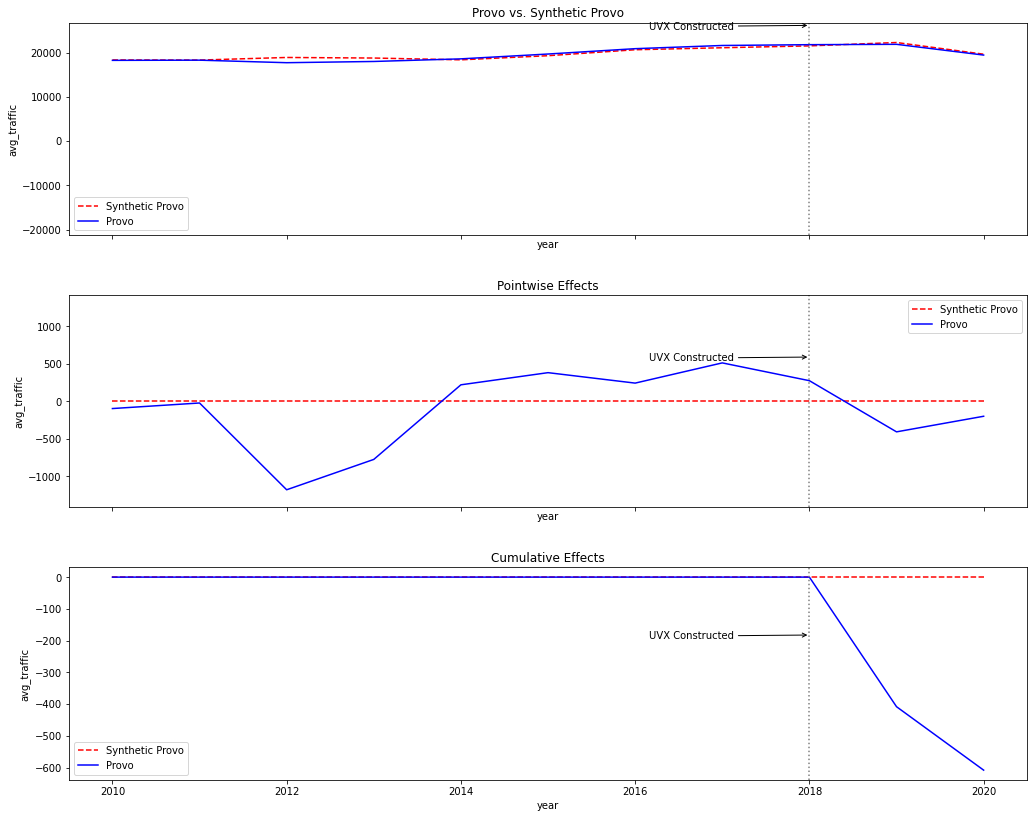

In [ ]:
#fit synthetic control and plot
from SyntheticControlMethods import Synth, DiffSynth
data = X_weighted

sc = Synth(data, "avg_traffic", "city", "year", 2019, "Provo", n_optim=100)
sc.plot(["original", "pointwise", "cumulative"], treated_label="Provo", 
            synth_label="Synthetic Provo", treatment_label="UVX Constructed")

Analyze Synthetic Control Model Performance

In [ ]:
#Get weight matrix of solution
weights=sc.original_data.weight_df
print(f'The weights used on the contries for synthetic Provo are the following: {weights}')
rpmse = sc.original_data.rmspe_df
print('This table shows the root predicted mean square error between the synthetic and true versions of Provo')
print(rpmse)
print('This table shows the comparison between the covariates of synthetic and true Provo')
print(sc.original_data.comparison_df)

#if this does poorly read throught the documentation and try diffsynth

The weights used on the contries for synthetic Provo are the following:               Weight
Cedar       0.102699
Ogden       0.099097
westjordan  0.462214
westvalley  0.335984
This table shows the root predicted mean square error between the synthetic and true versions of Provo
    unit   pre_rmspe  post_rmspe  post/pre
0  Provo  537.954306  321.456309  0.597553
This table shows the comparison between the covariates of synthetic and true Provo
                       Provo  Synthetic Provo     WMAPE  Importance
Population_Density    122.52           518.56    745.64        0.22
Population             33.39            25.38     20.10        0.01
GDP_County           -426.47           206.88    725.04        0.00
College_Enrollment   -942.18           232.83   1175.01        0.11
Cars                 -312.24           210.02    678.17        0.00
Unemployment          -45.31            40.06     85.37        0.33
Percent_White          10.58          -192.15    206.05        0.00
Percent

Placebo Testing

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:255: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


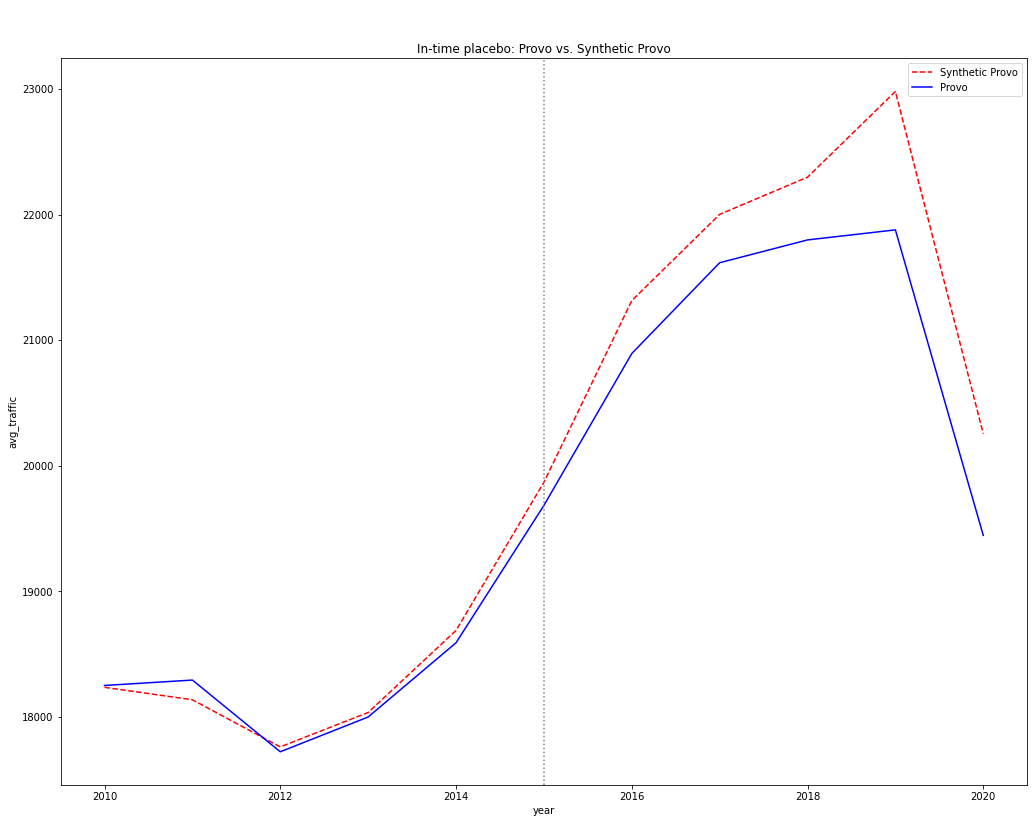

In [ ]:
#In-time placebo 2015 instead of 2019

sc.in_time_placebo(2015, n_optim=10)

#Visualize
sc.plot(['in-time placebo'], 
            treated_label="Provo",
            synth_label="Synthetic Provo")

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


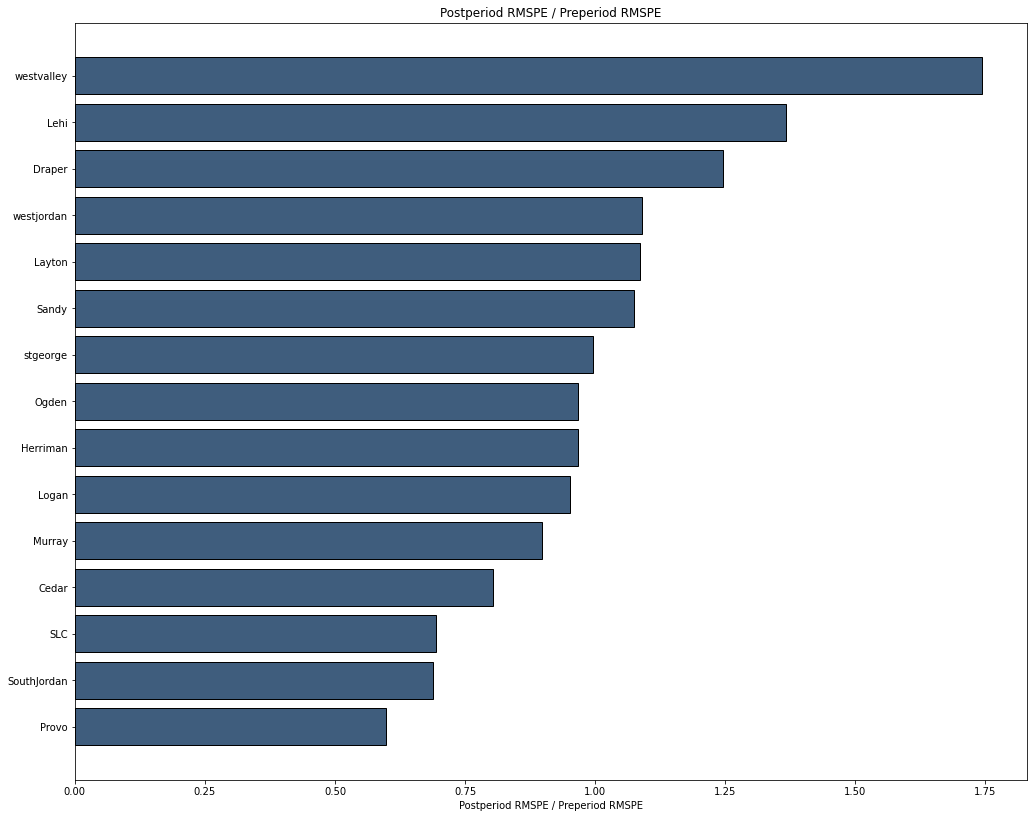

In [ ]:
#Compute in-space placebos
sc.in_space_placebo(14)
#Visualize
sc.plot(['rmspe ratio'])

The End